# Data Driven Project: Elettric Consumption Prediction

In this project, we will employ the machine learning technique in order to predict the amount of energy used by appliaces in a low energy building.
we use a .csv file (source: https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction) which contains a dataset contening datas for more or less 5 month: from January to May. Toghether with the Energy Consumption(our Objective), we find several data, mainly reguarding internal and external climate features.
here the following datas:

- Energy Consumption [Wh]
- Light Energy Consumption [Wh] 
- T1, Temperature in kitchen area[°C]
- RH_1, Humidity in kitchen area [%] 
- T2, Temperature in living room area [°C]
- RH_2, Humidity in living room area [%]
- T3, Temperature in laundry room area [°C]
- RH_3, Humidity in laundry room area [%] 
- T4, Temperature in office room [°C]
- RH_4, Humidity in office room [%]
- T5, Temperature in bathroom [°C]
- RH_5, Humidity in bathroom [%]
- T6, Temperature outside the building (north side) [°C]
- RH_6, Humidity outside the building (north side) [%] 
- T7, Temperature in ironing room [°C]
- RH_7, Humidity in ironing room [%] 
- T8, Temperature in teenager room 2 [°C]
- RH_8, Humidity in teenager room 2 [%] 
- T9, Temperature in parents room [°C]
- RH_9, Humidity in parents room [%]  
- To, Temperature outside (from a near weather station) [°C]
- Pressure (from a near weather station) [mm Hg] 
- RH_out, Humidity outside (from a near weather station) [%]  
- Wind speed (from a near weather station) [m/s] 
- Visibility (from a near weather station) [km]
- Tdewpoint (from a near weather station) [°C]
- rv1, Random variable 1 [nondimensional]
- rv2, Random variable 2 [nondimensional] 

Our aim is to find a correlation between some of those features and energy consumption and than utilize the machine learning algortim.



First i have to import the data that we wish to analize from the file.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

ExternalFilesFolder =  r"C:\Users\LoruPortatile\Desktop\clima 2\project Pyton"
DataFileName= "EnergyProjectData.csv"
path_EnergyProjectData= os.path.join(ExternalFilesFolder,DataFileName)
DF_EnergyProject = pd.read_csv(path_EnergyProjectData,sep=",", index_col=0)

PreviousIndex = DF_EnergyProject.index
NewParsedIndex= pd.to_datetime(PreviousIndex)
DF_EnergyProject.index =NewParsedIndex 

DF_EnergyProject.head()


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


The file contains a year worth of data, do we choose:

In [2]:
DF_Aril_EnergyProject = DF_EnergyProject["2016-04-01 00:00:00":"2016-04-17 23:00:00"]
DF_Aril_EnergyProject.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,...,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000
mean,102.173557,2.386410,22.001551,41.787882,20.429926,42.909857,23.218708,39.182789,21.395303,39.643560,...,20.624540,41.957622,9.692182,752.035325,78.348547,3.550143,35.899918,5.805055,24.871487,24.871487
std,108.863834,5.940851,0.629815,2.413029,1.485433,3.180306,0.978384,1.293097,0.898778,2.012931,...,0.450226,2.689508,3.658846,3.343922,13.366526,2.038139,10.050144,2.370437,14.549440,14.549440
min,20.000000,0.000000,20.700000,35.966667,17.700000,34.790000,21.500000,36.290000,19.533333,35.334000,...,19.390000,32.730000,0.800000,744.500000,44.000000,0.000000,1.000000,0.600000,0.030666,0.030666
25%,50.000000,0.000000,21.500000,39.900000,19.290000,40.837917,22.500000,38.260000,20.790000,38.260000,...,20.390000,39.790000,7.233333,750.033333,68.666667,2.000000,28.500000,4.183333,11.994387,11.994387
50%,60.000000,0.000000,22.033333,41.563333,20.290000,43.590000,23.100000,39.090000,21.390000,39.090000,...,20.700000,42.200000,9.800000,751.700000,79.666667,3.000000,40.000000,5.566667,24.859119,24.859119
75%,100.000000,0.000000,22.500000,43.133333,21.463333,45.145000,23.790000,39.900000,22.100000,40.700000,...,20.890000,43.860000,12.091667,753.708333,90.000000,5.000000,40.000000,7.500000,37.411169,37.411169
max,900.000000,30.000000,23.666667,57.496667,24.600000,56.026667,26.700000,44.363333,23.760000,47.030000,...,23.840000,48.260000,19.700000,761.500000,100.000000,9.000000,66.000000,11.400000,49.992758,49.992758


The first column is called "Appliances" and is actually the information on Energy Consumption.
Then, we find several factors, mainly regarding the climate into the house, but also about the atmospheric condition. 

We don't like the name Appliences for our Consumption datas so i rename that

In [13]:
DF_Aril_EnergyProject=DF_Aril_EnergyProject.rename(columns={"Appliances":"Consumption"})
DF_Aril_EnergyProject.head()

,Consumption,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-04-01 00:00:00,60,0,22.390000,39.2,19.9175,41.745,22.29,38.900000,20.390000,39.966667,...,20.1,41.700000,6.500000,756.500000,88.000000,5.000000,65.000000,4.6,45.750265,45.750265
2016-04-01 00:10:00,60,0,22.390000,39.2,19.8900,41.700,22.34,38.900000,20.390000,39.900000,...,20.1,41.826667,6.466667,756.633333,88.166667,4.833333,64.833333,4.6,3.104590,3.104590
2016-04-01 00:20:00,60,0,22.356667,39.2,19.7900,41.590,22.39,38.900000,20.390000,39.900000,...,20.1,41.900000,6.433333,756.766667,88.333333,4.666667,64.666667,4.6,42.513996,42.513996
2016-04-01 00:30:00,50,0,22.290000,39.2,19.7900,41.590,22.39,38.900000,20.390000,39.900000,...,20.1,42.030000,6.400000,756.900000,88.500000,4.500000,64.500000,4.6,8.804685,8.804685
2016-04-01 00:40:00,50,0,22.290000,39.2,19.7000,41.590,22.39,38.826667,20.323333,39.826667,...,20.1,42.090000,6.366667,757.033333,88.666667,4.333333,64.333333,4.6,21.169361,21.169361


We are going to consider our Energy Consumption as the dependent variable

In [14]:
DF_April_Consumption=DF_Aril_EnergyProject['Consumption'].to_frame()
DF_April_Consumption.head()
DF_April_Consumption.describe()

,Consumption
count,2443.000000
mean,102.173557
std,108.863834
min,20.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,900.000000


Our Consumption is in Watt per hour

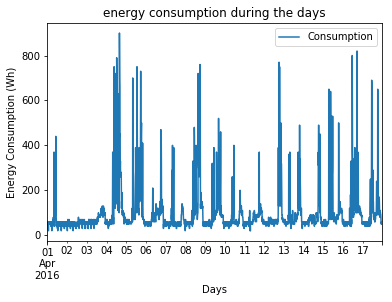

In [15]:
plt.figure()
DF_April_Consumption.plot()
plt.xlabel("Days")
plt.ylabel("Energy Consumption (Wh)")
plt.title("energy consumption during the days")
plt.show()


in the datas are present differt kind of informations, so we need to choose the information that most likely the consumption data depens on.


Like Tout datas (Outdoor temperature, the smaller it is, bigger is the energy consumption.

like lights datas direct electric consumption.

Other informations like the relative umidity can be ignored for the moment


In [16]:
DF_April_Tout=DF_Aril_EnergyProject['T_out'].to_frame()
DF_April_Tout.describe()

DF_April_Lights=DF_Aril_EnergyProject['lights'].to_frame()
DF_April_Lights.describe()

DF_joined = DF_April_Consumption.join([DF_April_Tout,DF_April_Lights])

DF_joined_cleaned = DF_joined.dropna() #just in case there is any element not definite
DF_joined_cleaned.head()

DF_joined_cleaned_copy = DF_joined.dropna().copy()


We will plot this informations to see if there is an actual conection, but first i have to nomalize the datas

In [17]:

df_chosen_dates_normalized = (DF_joined_cleaned- DF_joined_cleaned.min())/(DF_joined_cleaned.max()-DF_joined_cleaned.min())
df_chosen_dates_normalized.head()

df_chosen_dates_normalized = df_chosen_dates_normalized["2016-04-12 00:00:00":"2016-04-17 23:00:00"]


We have to choose a shorter time span because the plot is a bit chaotic

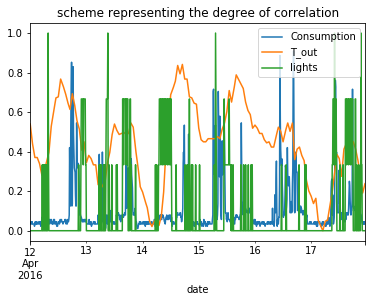

In [18]:

plt.figure()
df_chosen_dates_normalized.plot()
plt.title("scheme representing the degree of correlation")
plt.show()



As we can see the connection is strong enough.

We need to find more data that are strongly enought related to the data on Consumptions

In [19]:
DF_EnergyProject=DF_EnergyProject.rename(columns={"Appliances":"Consumption"})
DF_degree=DF_EnergyProject.corr()

Our iterest is only on the first raw so:

In [20]:
DF_degree_Consumption= DF_degree.loc[:,'Consumption']
DF_degree_Consumption.index
DF_degree_Consumption[:]

print("analizing the differnt value in relation with consumption we found out:"+ str(DF_degree_Consumption.describe()))
print("28 varible and the 75% have only a relation value of 0.085 on a max of 1")


analizing the differnt value in relation with consumption we found out:count    28.000000
mean      0.053742
std       0.199767
min      -0.152282
25%      -0.017080
50%       0.018363
75%       0.085303
max       1.000000
Name: Consumption, dtype: float64
28 varible and the 75% have only a relation value of 0.085 on a max of 1


In order to choose a sufficent number of variables we have to choose even those variables which have a low level of reletion with consumpition's value.

In [21]:
DF_degree_Consumption[:]


Consumption    1.000000
lights         0.197278
T1             0.055447
RH_1           0.086031
T2             0.120073
RH_2          -0.060465
T3             0.085060
RH_3           0.036292
T4             0.040281
RH_4           0.016965
T5             0.019760
RH_5           0.006955
T6             0.117638
RH_6          -0.083178
T7             0.025801
RH_7          -0.055642
T8             0.039572
RH_8          -0.094039
T9             0.010010
RH_9          -0.051462
T_out          0.099155
Press_mm_hg   -0.034885
RH_out        -0.152282
Windspeed      0.087122
Visibility     0.000230
Tdewpoint      0.015353
rv1           -0.011145
rv2           -0.011145
Name: Consumption, dtype: float64

Unfortunally the values are low.
We need to cream off those values and consider the highest ones (that are quite low anyway).

Therefore firstly we will consider only the column related with The ettric consumption, then we will take into account only the higher than 0.06 ---> 6%. 

In [22]:
df_choosen= DF_degree_Consumption>0.06 # 6% as minimum value
df_choosen=df_choosen[df_choosen] # true value
print("the choosen variables are:" +str(df_choosen.index.tolist()))

the choosen variables are:['Consumption', 'lights', 'RH_1', 'T2', 'T3', 'T6', 'T_out', 'Windspeed']


even if we have choosen a higher number of varabile it is still not enough so we will now use lagged data:

In [23]:

lag_start=1
lag_end = 6
lag_interval=1

DF_test=DF_Aril_EnergyProject.copy()

def lag_feature(df,column_names,lag_start,lag_end,lag_interval):
    for column in column_names:
        for i in range(lag_start,lag_end+1,lag_interval):
            new_column_name = column+" -"+str(i*10)+"min"
            df[new_column_name]=df[column].shift(i)   
            df.dropna(inplace=True) #this removes all the row with a Nan
    return df
    
column_names=df_choosen.index.tolist()
DF_mod=lag_feature(DF_test,column_names,lag_start,lag_end,lag_interval)
DF_mod.head(24)


,Consumption,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out -30min,T_out -40min,T_out -50min,T_out -60min,Windspeed -10min,Windspeed -20min,Windspeed -30min,Windspeed -40min,Windspeed -50min,Windspeed -60min
date,,,,,,,,,,,,,,,,,,,,,
2016-04-02 04:00:00,30,0,21.200000,38.900000,18.79,42.500000,22.033333,37.200000,20.100000,38.200000,...,7.250000,7.300000,7.350000,7.400000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
2016-04-02 04:10:00,30,0,21.200000,38.900000,18.79,42.560000,22.033333,37.200000,20.100000,38.200000,...,7.200000,7.250000,7.300000,7.350000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
2016-04-02 04:20:00,50,0,21.200000,38.900000,18.70,42.590000,22.000000,37.200000,20.100000,38.200000,...,7.150000,7.200000,7.250000,7.300000,1.833333,2.000000,2.000000,2.000000,2.000000,2.000000
2016-04-02 04:30:00,40,0,21.200000,39.000000,18.70,42.590000,21.926667,37.200000,20.066667,38.163333,...,7.100000,7.150000,7.200000,7.250000,1.666667,1.833333,2.000000,2.000000,2.000000,2.000000
2016-04-02 04:40:00,50,0,21.200000,39.000000,18.70,42.590000,21.856667,37.200000,20.000000,38.090000,...,7.066667,7.100000,7.150000,7.200000,1.500000,1.666667,1.833333,2.000000,2.000000,2.000000
2016-04-02 04:50:00,60,0,21.200000,39.000000,18.70,42.663333,21.790000,37.200000,20.000000,38.090000,...,7.033333,7.066667,7.100000,7.150000,1.333333,1.500000,1.666667,1.833333,2.000000,2.000000
2016-04-02 05:00:00,50,0,21.200000,38.933333,18.70,42.700000,21.790000,37.200000,20.000000,38.090000,...,7.000000,7.033333,7.066667,7.100000,1.166667,1.333333,1.500000,1.666667,1.833333,2.000000
2016-04-02 05:10:00,60,0,21.200000,38.933333,18.60,42.530000,21.790000,37.200000,20.000000,38.090000,...,6.966667,7.000000,7.033333,7.066667,1.000000,1.166667,1.333333,1.500000,1.666667,1.833333
2016-04-02 05:20:00,50,0,21.200000,39.000000,18.60,42.590000,21.790000,37.200000,20.000000,38.200000,...,6.933333,6.966667,7.000000,7.033333,1.000000,1.000000,1.166667,1.333333,1.500000,1.666667


Now that the number of variablies is higher,we repet what we have done previusly.


In [24]:
DF_degree2=DF_mod.corr()
DF_degree_Consumption2= DF_degree2.loc[:,'Consumption']
DF_degree_Consumption2.index

print("analizing the new different variables in relation with consumption we found out:"+ str(DF_degree_Consumption2.describe()))
print("70 varible and the 75% have a relation value of 0.24 on a max of 1, a much better situation than before")


analizing the new different variables in relation with consumption we found out:count    76.000000
mean      0.200769
std       0.175158
min      -0.230385
25%       0.125535
50%       0.199059
75%       0.242751
max       1.000000
Name: Consumption, dtype: float64
70 varible and the 75% have a relation value of 0.24 on a max of 1, a much better situation than before


In [25]:

df_choosen2= DF_degree_Consumption2>0.06 # 6% as minimum value
df_choosen2=df_choosen2[df_choosen2]# true value
print("choosen variable are:" +str(df_choosen2.index.tolist()))


choosen variable are:['Consumption', 'lights', 'T1', 'RH_1', 'T2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'T7', 'T8', 'T9', 'T_out', 'Windspeed', 'Visibility', 'Consumption -10min', 'Consumption -20min', 'Consumption -30min', 'Consumption -40min', 'Consumption -50min', 'Consumption -60min', 'lights -10min', 'lights -20min', 'lights -30min', 'lights -40min', 'lights -50min', 'lights -60min', 'RH_1 -10min', 'RH_1 -20min', 'RH_1 -30min', 'RH_1 -40min', 'RH_1 -50min', 'RH_1 -60min', 'T2 -10min', 'T2 -20min', 'T2 -30min', 'T2 -40min', 'T2 -50min', 'T2 -60min', 'T3 -10min', 'T3 -20min', 'T3 -30min', 'T3 -40min', 'T3 -50min', 'T3 -60min', 'T6 -10min', 'T6 -20min', 'T6 -30min', 'T6 -40min', 'T6 -50min', 'T6 -60min', 'T_out -10min', 'T_out -20min', 'T_out -30min', 'T_out -40min', 'T_out -50min', 'T_out -60min', 'Windspeed -10min', 'Windspeed -20min', 'Windspeed -30min', 'Windspeed -40min', 'Windspeed -50min', 'Windspeed -60min']


Those are the features whose correlation with energy consumption is higher

In [26]:
DF_test= DF_mod.loc[:,df_choosen2.index.tolist()]
DF_test.dropna(inplace=True)
DF_target = DF_test[["Consumption"]]
DF_features = DF_test.drop("Consumption",axis=1)
print ("We create a New Data Frame with index: ")+str(list(DF_features ))


We create a New Data Frame with index: ['lights', 'T1', 'RH_1', 'T2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'T7', 'T8', 'T9', 'T_out', 'Windspeed', 'Visibility', 'Consumption -10min', 'Consumption -20min', 'Consumption -30min', 'Consumption -40min', 'Consumption -50min', 'Consumption -60min', 'lights -10min', 'lights -20min', 'lights -30min', 'lights -40min', 'lights -50min', 'lights -60min', 'RH_1 -10min', 'RH_1 -20min', 'RH_1 -30min', 'RH_1 -40min', 'RH_1 -50min', 'RH_1 -60min', 'T2 -10min', 'T2 -20min', 'T2 -30min', 'T2 -40min', 'T2 -50min', 'T2 -60min', 'T3 -10min', 'T3 -20min', 'T3 -30min', 'T3 -40min', 'T3 -50min', 'T3 -60min', 'T6 -10min', 'T6 -20min', 'T6 -30min', 'T6 -40min', 'T6 -50min', 'T6 -60min', 'T_out -10min', 'T_out -20min', 'T_out -30min', 'T_out -40min', 'T_out -50min', 'T_out -60min', 'Windspeed -10min', 'Windspeed -20min', 'Windspeed -30min', 'Windspeed -40min', 'Windspeed -50min', 'Windspeed -60min']



Now time is to create a training dataset for machine learning and provide an independent testset.
The sklearn.model_selection module contains a machine learning algorithm which enable us to implement the linear regression method. 
We will plot the real value of consumption and the predicted one in order to make a comparison.


In [27]:

from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(DF_features,DF_target,test_size = 0.2, random_state=41234)

from sklearn import linear_model

linear_reg = linear_model.LinearRegression()



The second step will be fitting a model


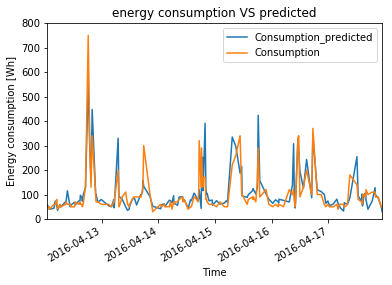

In [28]:
linear_reg.fit(X_train, Y_train)

predicted_linearReg_split = linear_reg.predict(X_test)

predicted_DF_linearReg_split=pd.DataFrame(predicted_linearReg_split,index=Y_test.index, columns=["Consumption_predicted"])
predicted_DF_linearReg_split=predicted_DF_linearReg_split.join(Y_test)
predicted_DF_linearReg_split_April=predicted_DF_linearReg_split["2016-04-12 00:00:00":"2016-04-17 23:00:00"]
predicted_DF_linearReg_split_April.plot()
plt.xlabel('Time')
plt.ylabel('Energy consumption [Wh]')
plt.title("energy consumption VS predicted")
plt.ylim([0,800])
plt.show()

We see that our prediction, although it does not match perfectly, follows the consumption profile.
Now we want calculate how accurate our predictions are !!
So, again we import everything


In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE_linearReg_split= mean_absolute_error(Y_test,predicted_linearReg_split)
MSE_linearReg_split= mean_squared_error(Y_test,predicted_linearReg_split)
R2_linearReg_split = r2_score(Y_test,predicted_linearReg_split)
print "Mean squared error is " + str(MAE_linearReg_split)
print "Mean absoulute error is " + str(MSE_linearReg_split)
print "R2 score is " + str(R2_linearReg_split)

Mean squared error is 28.3968885012
Mean absoulute error is 2424.16256703
R2 score is 0.682807321806


These parameters can objectively evaluate the quality of our predictions

- The R2 value expresses how much our model fit the given values, and acquires a value between 0 and 1. 1 means that our predictions perfectly match consumption, good estimates are obtained with values around 0.6
- mean absolute error points out the dispersion of the data around the regression line
- mean squared error is another way to express the dispersion


Our R2 score high enough, and also the errors values are quite high.
Now, let's try another algorithm! Random forests are a very good candidate!


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict

reg_RF = RandomForestRegressor()

predict_RF_CV = cross_val_predict(reg_RF,DF_features,DF_target,cv=10)

predicted_DF_RF_CV=pd.DataFrame(predict_RF_CV,
                                       index=DF_target.index, 
                                       columns=["Consumption_predicted_RF_CV"])
predicted_DF_RF_CV=predicted_DF_RF_CV.join(DF_target)
predicted_DF_RF_CV_April=predicted_DF_RF_CV["2016-04-12 00:00:00":"2016-04-17 23:00:00"]


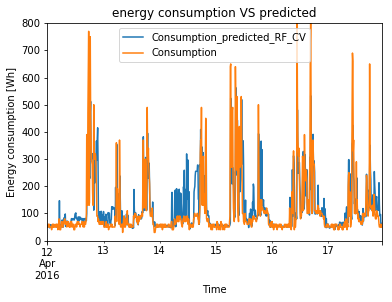

In [33]:


predicted_DF_RF_CV_April.plot()
plt.xlabel('Time')
plt.ylabel('Energy consumption [Wh]')
plt.title("energy consumption VS predicted")
plt.ylim([0,800])
plt.show()

In [35]:
MAE_RF_CV= mean_absolute_error(DF_target,predict_RF_CV)
MSE_RF_CV= mean_squared_error(DF_target,predict_RF_CV)
R2_RF_CV = r2_score(DF_target,predict_RF_CV)

print "Mean squared error is " + str(MAE_RF_CV)
print "Mean absoulute error is " + str(MSE_RF_CV)
print "R2 score is " + str(R2_RF_CV)
print " "
print "the Mean squared error difference is " + str(MSE_RF_CV-MSE_linearReg_split)
print "Mean absoulute error is " + str(MAE_RF_CV-MAE_linearReg_split)
print "delta R2 score is " + str(R2_linearReg_split-R2_RF_CV)

Mean squared error is 49.5384615385
Mean absoulute error is 7680.65934066
R2 score is 0.380183805391
 
the Mean squared error difference is 5256.49677363
Mean absoulute error is 21.1415730372
delta R2 score is 0.302623516414


Given the value we see that the first method is much better even if the error values are still high.